In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [26]:
def System(r,t,mu=1.5):
    
    x,vx = r
    
    dxdt = vx
    dvxdt = mu*(1-x**2)*vx - x
    
    return np.array([dxdt,dvxdt])

In [27]:
t = np.linspace(0,20,10000)
r0 = [0.5,0.]

In [28]:
sol = odeint(System, r0, t, args=(1.3,))

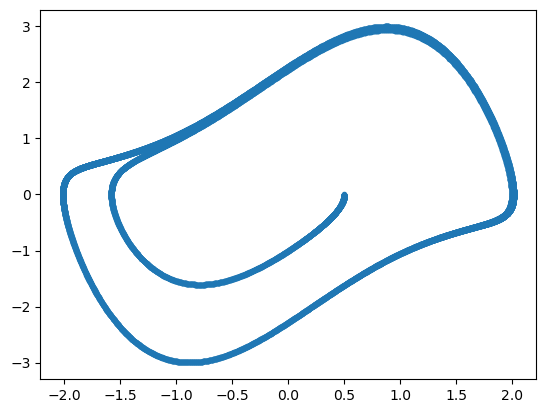

In [29]:
plt.scatter(sol[:,0],sol[:,1],marker='.')

In [33]:
def IntegratorAdams(f,r0,t,mu):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    vx = np.zeros_like(t)
    
    x[0] = r0[0]
    vx[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    
    present = np.array([x[0],vx[0]])
    K11 = f(present,t[0],mu)
    
    # RK4
    for i in range (1, 3):
        
        r = np.array([x[1-i], vx[1-i]])
        k1 = f(r, t[i])
        k2 = f(r+0.5*h*k1, t[i]+0.5*h)
        k3 = f(r+0.5*h*k2, t[i]+0.5*h)
        k4 = f(r+h*k3, t[i]+h)
        
        x[i] = x[i-1] + (1/6)*h*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        vx[i] = vx[i-1] + (1/6)*h*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
    
    xc = x.copy()
    vxc = vx.copy()
    
    for i in range(4,len(t)):
        
        p1 = np.array([x[i-1],vx[i-1]])
        p2 = np.array([x[i-2],vx[i-2]])
        p3 = np.array([x[i-3],vx[i-3]])
        p4 = np.array([x[i-4],vx[i-4]])
        
        K11 = f(p1,t[i-1],mu)
        K12 = f(p2,t[i-2],mu)
        K13 = f(p3,t[i-3],mu)
        K14 = f(p4,t[i-4],mu)
        
        x[i] = x[i-1] + h*((55/24)*K14[0]-(59/24)*K13[0]+(37/24)*K12[0]-(9/24)*K11[0])
        vx[i] = vx[i-1] + h*((55/24)*K14[1]-(59/24)*K13[1]+(37/24)*K12[1]-(9/24)*K11[1])
        
        xc[i] = x[i]
        vxc[i] = vx[i]
        
        # Futuro
        futuro = np.array([x[i],vx[i]])
        K15 = f(futuro,t[i],mu)
        
        xc[i] = xc[i-1] + h*(251*K15[0]+646*K14[0]-264*K13[0]+106*K12[0]-19*K11[0])/720
        vxc[i] = vxc[i-1] + h*(251*K15[1]+646*K14[1]-264*K13[1]+106*K12[1]-19*K11[1])/720
    
    return x,vx,xc,vxc

In [34]:
sol2 = IntegratorAdams(System,r0,t,1.3)

0.002000200020002


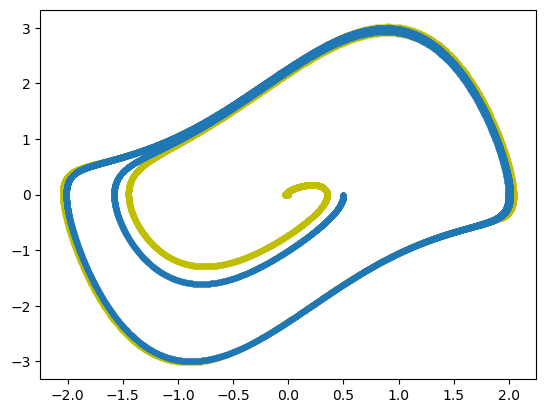

In [36]:
#plt.scatter(sol2[0],sol2[1],color='r')
plt.scatter(sol2[2],sol2[3],marker='.',color='y')
plt.scatter(sol[:,0],sol[:,1],marker='.')

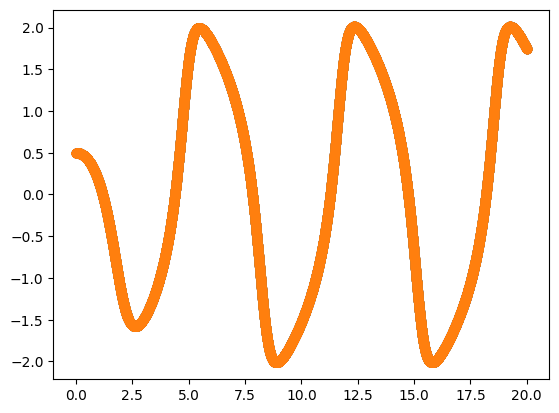

In [47]:
plt.scatter(t,sol[:,0])
plt.scatter(t,sol2[2])

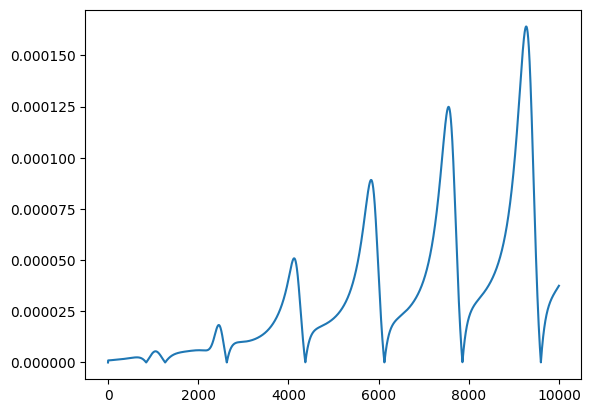

In [49]:
plt.plot(np.abs(sol2[2]-sol[:,0]))

In [21]:
x = np.array([1.,2.])
y = np.array([1.,2.])
y+x*2.2*(x[0]-y[0])

array([1., 2.])